# Pokémon: gotta catch'em all!!

Hello again! Following last week's project, let's analyse our Pokémon data set and do some statistics analysis. For that, we'll calculate some stats, and support our conclusion with some data visualization.

Regarding our statistical analysis we'll explore:

- Strongests Pokémon: clustering
- Type distribution
- Catch rate

# Strongest Pokémon

First thinks first, let's import our data set into a data frame:

In [1]:
import pandas as pd
import numpy as np

In [2]:
import pylab as plt
import seaborn as sns

In [3]:
df = pd.read_excel('Pokemon151.xlsx')

Let's check if our data was correctly loaded:

In [4]:
df.head(3)

,number,name,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,45
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,45
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,45


Perfect! Let's start with the first question: "what's the strongest Pokémon?" This answer may seem quite obvious, but let's do some statistics! I'll assume that the best Pokémon is the one that reunites the best combo of the following:

- hp
- attack
- defense
- sp_atk
- sp_def
- speed

Let's assume that all these factors are equally important, so we'll  define a new statistics called "total" as being the sum of these for any Pokémon. For that, let's create a new column in our DataFrame:

In [5]:
sum_column = df['hp'] + df['attack'] + df['defense'] + df['sp_atk'] + df['sp_def'] + df['speed']
df['total'] = sum_column

In [6]:
df.total.describe()

count    151.00000
mean     407.07947
std       99.74384
min      195.00000
25%      320.00000
50%      405.00000
75%      490.00000
max      680.00000
Name: total, dtype: float64

So, we have 151 Pokémon with a total mean of ~407.1 with a standard deviation of ~99.7. We have a huge range between the maximum and the minimum values:

In [7]:
print('difference between the maximum and minimum values:', df.total.max() - df.total.min())
print('ratio difference over the maximum:', round((df.total.max() - df.total.min())/df.total.max(),2)*100, '%')

difference between the maximum and minimum values: 485
ratio difference over the maximum: 71.0 %


Regardless, we have the Pokémons with the lowest and highest total which would be:

In [8]:
print('Pokémon with the lowest total:\n', 'total =',df.total.min(), ';', df[df['total'] == df.total.min()]['name'], '\n----------------------------')
print('Pokémon with the highest total:\n', 'total =',df.total.max(), ';', df[df['total'] == df.total.max()]['name'])

Pokémon with the lowest total:
 total = 195 ; 9     Caterpie
12      Weedle
Name: name, dtype: object 
----------------------------
Pokémon with the highest total:
 total = 680 ; 149    Mewtwo
Name: name, dtype: object


Of course, Mewtwo is the Pokémon that reunites that best statistics (I'm not surprised). The Pokémons with the lowest are Caterpie and Weedle (they're small bugs, so kinda expected as well). Let's keep our readings!
Regarding the percentiles/ quartiles:

 - 25% of the Pokémon (~38 Pokémon) have a total value not superior than 320
 
 
 - 50% of the Pokémon (~76 Pokémon) have a total value not superior than 405
 
 
 - 75% of the Pokémon (~113 Pokémon) have a total value not superior than to 490
 
Let's plot the above statement in a box whiskers plot, mark the average total (red line), highlight the median (blue), the minimum (Caterpie and Weedle with green) and the maximum (Mewtwo with purple):

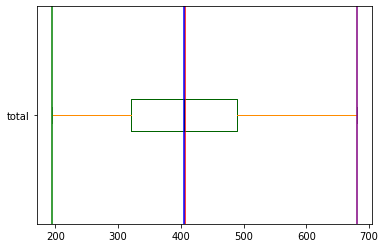

In [9]:
colour={'boxes': 'DarkGreen',
       'whiskers': 'DarkOrange',
       'medians': 'DarkBlue',
       'caps': 'Gray'}

df.total.plot.box(color = colour, vert = False);
plt.axvline(df['total'].mean(), color='r'); #mean
plt.axvline(df['total'].median(), color='b'); #median
plt.axvline(df['total'].max(), color='purple'); #max
plt.axvline(df['total'].min(), color='g'); #min

Let us plot an histogram to check the total distribution over the 151 Pokémon:

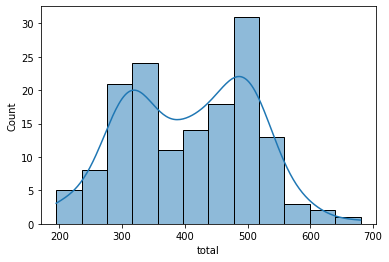

In [10]:
sns.histplot(x=df.total, bins=12, kde=True);

First things first: Mewtwo is a super Pokémon (remeber the maximium value and how long is the right whisker of our box plot diagram). Therefore, he is greatly influencing our statistics. Let us inspect our new dataframe but without this one to have a clearer picture, and repeat the same methodology:

In [11]:
df2 = df.drop([149])
df2.tail()

,number,name,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate,total
145,146,Moltres,Fire,Flying,90,100,90,125,85,90,True,3,580
146,147,Dratini,Dragon,no type,41,64,45,50,50,50,False,45,300
147,148,Dragonair,Dragon,no type,61,84,65,70,70,70,False,45,420
148,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,False,45,600
150,151,Mew,Psychic,no type,100,100,100,100,100,100,False,45,600


In [12]:
df2.total.describe()

count    150.00000
mean     405.26000
std       97.53137
min      195.00000
25%      320.00000
50%      405.00000
75%      490.00000
max      600.00000
Name: total, dtype: float64

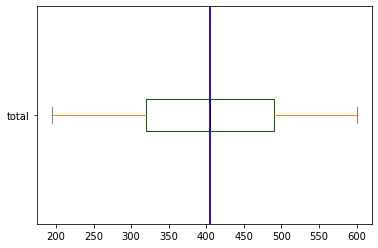

In [13]:
colour={'boxes': 'DarkGreen',
       'whiskers': 'DarkOrange',
       'medians': 'DarkBlue',
       'caps': 'Gray'}

df2.total.plot.box(color = colour, vert = False);
plt.axvline(df2['total'].mean(), color='r'); #mean
plt.axvline(df2['total'].median(), color='b'); #median

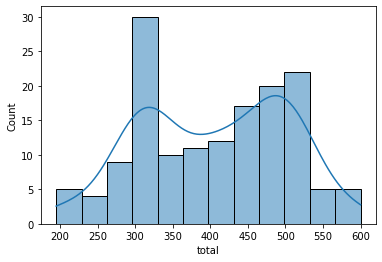

In [14]:
sns.histplot(x=df2.total, bins=12, kde=True);

By comparing the two sets of graphs above (df vs df2) one can surely state that Mewtwo is in fact an outlier. Let's define a criteria and check what's happening there:

The criteria is if there any Pokémons which the total value is less than $Q1 - k * IQR$ or greater than $Q3 + k * IQR$, being $k$ a real number, shall not be considered for now. This implies that if a Pokémon has a total value less than $Q1 - k * IQR$ we'll be classified as "weak". Obviously, if a Pokémon has a total value greater than $Q3 - k * IQR$ we'll be classified as "very strong". I did some simulations and I defined $k = 0.10$. Note that this is a empirical method! I tried many different $k$ to inspect whether it made sense for a qualititive point of view (having x Pokémon in some classes that didn't make sense):

In [15]:
q1=np.quantile(df2.total, 0.25)

q3=np.quantile(df2.total, 0.75)

iqr=q3-q1

classf = []

for i in df2.total:
    if i < (q1 - 0.1*iqr):
        classf.append('low')
    elif i > (q3 + 0.1*iqr):
        classf.append('high')
    else:
        classf.append('normal')
df2['class'] = classf
df2.groupby('class').count()

,number,name,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate,total
class,,,,,,,,,,,,,
high,21,21,21,21,21,21,21,21,21,21,21,21,21
low,24,24,24,24,24,24,24,24,24,24,24,24,24
normal,105,105,105,105,105,105,105,105,105,105,105,105,105


For now, I'll focus on 105 Pokémon classified as "normal" which represents 70% of our 150. I'm very comfortable with that! Note that by doing this, we already know that Pokémons belonging to the class "high" should be strong ones, and low should be weak ones. We'll get to that after!

# Normal

I still think that we can do some further classification regarding the Pokémon classified as normal. For that, let's proceed with the same method:

In [16]:
normal = df2[df2['class'] == 'normal']
normal.total.describe()

count    105.000000
mean     410.200000
std       69.065938
min      305.000000
25%      340.000000
50%      405.000000
75%      480.000000
max      505.000000
Name: total, dtype: float64

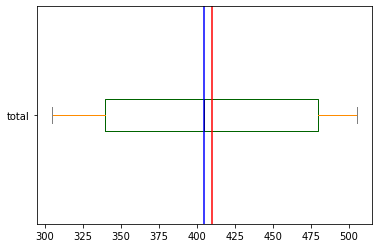

In [17]:
colour={'boxes': 'DarkGreen',
       'whiskers': 'DarkOrange',
       'medians': 'DarkBlue',
       'caps': 'Gray'}

normal.total.plot.box(color = colour, vert = False);
plt.axvline(normal['total'].mean(), color='r'); #mean
plt.axvline(normal['total'].median(), color='b'); #median

Comparing the above box whiskers plot with the ones previously shown, one can state that this subset is more homegenous (look to the size of the tails!). In other words, this subset has a smaller standard deviation:

In [18]:
print('Standard deviation over the mean df2:', round(df2.total.std()/df2.total.mean(),2) *100,'%', '\n','Standard deviation over the mean normal:' , round(normal.total.std()/normal.total.mean(),2) *100,'%')

Standard deviation over the mean df2: 24.0 % 
 Standard deviation over the mean normal: 17.0 %


I shall normalise the data to still do some classifications within the classified as normal. For that, I shall define the function:


$z = (total_i - mean)  /  (std/sqrt(n))$


where total i is the total value of the i-th Pokémon, mean and std the estimated values for the mean and standard deviation subset, n the dimension of our subset ( in this case 105 Pokémon). This being said:

In [19]:
def normalize(dataframe, column):
    
    norm=[]
    
    for i in dataframe[column]:
        z = ((i - dataframe[column].mean())*(len(dataframe[column])**(0.5)))/(dataframe[column].std())
        norm.append(z)
    return norm

In [20]:
norm_values = normalize(normal, 'total')
normal['norm'] = norm_values
normal.head()

<ipython-input-20-b50d7e62093c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal['norm'] = norm_values


,number,name,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate,total,class,norm
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,45,318,normal,-13.679230
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,45,405,normal,-0.771497
3,4,Charmander,Fire,no type,39,52,43,60,50,65,False,45,309,normal,-15.014513
4,5,Charmeleon,Fire,no type,58,64,58,80,65,80,False,45,405,normal,-0.771497
6,7,Squirtle,Water,no type,44,48,65,50,64,43,False,45,314,normal,-14.272689


Let's recall our statistics class: if a population follows a normal distribution with miu (being the mean of the population) and sigma (being the standard deviation of the population) parameters, one can say that:

- 68,2% of the population is contained in the interval [mean - std, mean + std]
- 95,4% of the population is contained in the interval [mean - 2 * std, mean + 2 * std]
- 99,7% of the population is contained in the interval [mean - 3 * std, mean + 3 * std]

I'll not demonstrate this, but z-values (normalised values) follow a normal distribution with "miu = mean", "sigma = standard deviation". Hence, we can segment the Pokémons based on this rigorous mathematical statement:

In [21]:
strenght = []

for i in normal.norm:
    if (i > normal.norm.mean()) & (i <= (normal.norm.mean() + normal.norm.std())):
        strenght.append('strong')
    elif i > (normal.norm.mean() + normal.norm.std()):
        strenght.append('very strong')
    elif (i > (normal.norm.mean() - normal.norm.std())) & (i <= normal.norm.mean()):
        strenght.append('standard')
    else:
        strenght.append('weak')
normal['power'] = strenght
normal.groupby('power').count()

<ipython-input-21-01808cc30384>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal['power'] = strenght


,number,name,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate,total,class,norm
power,,,,,,,,,,,,,,,
standard,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
strong,24,24,24,24,24,24,24,24,24,24,24,24,24,24,24
very strong,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
weak,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28


Let's recap what we've done so far:

 - Firstly, we identified Mewtwo as the strongest Pokémon, and thus, removed it from our subset as it was considered as an outlier;
 
 - Secondly, we divided our subset in:
     - low, for those whose total was less than Q1 (= 320) - 0.1 * IQR (= 170 ) = 303
     - high, for those whose total was greater than Q3 (= 490) + 0.1 * IQR = 507
     - normal, for those whose total was between 303 and 507
     
     
 - Then, we normalised the data from our subset named "normal" so we could distinguish between these:
 
     - weak, for those whose total was less than mean (= 410,2) -standard deviation (=  69,1) 
     - standard, for those whose total was between the mean - standard deviation and the mean
     - strong, for those whose total was between the mean and the mean + standard deviation
     - very strong, for those whose total was greater than mean mean + standard deviation

Now let's reunite all of these in a single column named power:

 - Those previously classified as low we'll be named "very weak"
 - Those previously classified as high we'll be named "beast"
 - Mewtwo will be  classified as high we'll be named "demigod"
 - Those in the normal will subset will keep their classification

In [113]:
test = df2.copy()
test

,number,name,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate,total,class
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,45,318,normal
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,45,405,normal
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,45,525,high
3,4,Charmander,Fire,no type,39,52,43,60,50,65,False,45,309,normal
4,5,Charmeleon,Fire,no type,58,64,58,80,65,80,False,45,405,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,Moltres,Fire,Flying,90,100,90,125,85,90,True,3,580,high
146,147,Dratini,Dragon,no type,41,64,45,50,50,50,False,45,300,low
147,148,Dragonair,Dragon,no type,61,84,65,70,70,70,False,45,420,normal
148,149,Dragonite,Dragon,Flying,91,134,95,100,100,80,False,45,600,high


In [114]:
normal.head()

,number,name,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate,total,class,norm,power
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,45,318,normal,-13.679230,weak
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,45,405,normal,-0.771497,standard
3,4,Charmander,Fire,no type,39,52,43,60,50,65,False,45,309,normal,-15.014513,weak
4,5,Charmeleon,Fire,no type,58,64,58,80,65,80,False,45,405,normal,-0.771497,standard
6,7,Squirtle,Water,no type,44,48,65,50,64,43,False,45,314,normal,-14.272689,weak


Now let's merge the two dataframe and proceed with some cleaning to achieve the last dataframe:

In [115]:
aux = pd.merge(test, normal[['name','norm', 'power']], how='left', left_on=test.name, right_on=normal.name)
aux.head()

,key_0,number,name_x,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate,total,class,name_y,norm,power
0,Bulbasaur,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,45,318,normal,Bulbasaur,-13.679230,weak
1,Ivysaur,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,45,405,normal,Ivysaur,-0.771497,standard
2,Venusaur,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,45,525,high,NaN,NaN,NaN
3,Charmander,4,Charmander,Fire,no type,39,52,43,60,50,65,False,45,309,normal,Charmander,-15.014513,weak
4,Charmeleon,5,Charmeleon,Fire,no type,58,64,58,80,65,80,False,45,405,normal,Charmeleon,-0.771497,standard


In [117]:
for i, e in enumerate(aux['class']):
    if e == 'high':
        aux['power'][i] = 'beast'
    elif e == 'low':
        aux['power'][i] = 'very weak'
aux.head()

<ipython-input-117-eba52bcfda3f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['power'][i] = 'beast'
<ipython-input-117-eba52bcfda3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['power'][i] = 'very weak'


,key_0,number,name_x,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate,total,class,name_y,norm,power
0,Bulbasaur,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,False,45,318,normal,Bulbasaur,-13.679230,weak
1,Ivysaur,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,False,45,405,normal,Ivysaur,-0.771497,standard
2,Venusaur,3,Venusaur,Grass,Poison,80,82,83,100,100,80,False,45,525,high,NaN,NaN,beast
3,Charmander,4,Charmander,Fire,no type,39,52,43,60,50,65,False,45,309,normal,Charmander,-15.014513,weak
4,Charmeleon,5,Charmeleon,Fire,no type,58,64,58,80,65,80,False,45,405,normal,Charmeleon,-0.771497,standard


In [119]:
df3 = aux.drop(['name_x', 'name_y', 'norm', 'class'], 1)
df3 = df3.rename(columns = {'key_0': 'name'})

df3

,name,number,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate,total,power
0,Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,False,45,318,weak
1,Ivysaur,2,Grass,Poison,60,62,63,80,80,60,False,45,405,standard
2,Venusaur,3,Grass,Poison,80,82,83,100,100,80,False,45,525,beast
3,Charmander,4,Fire,no type,39,52,43,60,50,65,False,45,309,weak
4,Charmeleon,5,Fire,no type,58,64,58,80,65,80,False,45,405,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Moltres,146,Fire,Flying,90,100,90,125,85,90,True,3,580,beast
146,Dratini,147,Dragon,no type,41,64,45,50,50,50,False,45,300,very weak
147,Dragonair,148,Dragon,no type,61,84,65,70,70,70,False,45,420,strong
148,Dragonite,149,Dragon,Flying,91,134,95,100,100,80,False,45,600,beast


In [132]:
mewtwo = pd.DataFrame(df.iloc[149]).transpose()
mewtwo

,number,name,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate,total
149,150,Mewtwo,Psychic,no type,106,110,90,154,90,130,True,3,680


In [135]:
final = pd.concat([df3, mewtwo])
final = final.sort_values('number')

,name,number,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,islegendary,catch_rate,total,power
0,Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,False,45,318,weak
1,Ivysaur,2,Grass,Poison,60,62,63,80,80,60,False,45,405,standard
2,Venusaur,3,Grass,Poison,80,82,83,100,100,80,False,45,525,beast
3,Charmander,4,Fire,no type,39,52,43,60,50,65,False,45,309,weak
4,Charmeleon,5,Fire,no type,58,64,58,80,65,80,False,45,405,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Dratini,147,Dragon,no type,41,64,45,50,50,50,False,45,300,very weak
147,Dragonair,148,Dragon,no type,61,84,65,70,70,70,False,45,420,strong
148,Dragonite,149,Dragon,Flying,91,134,95,100,100,80,False,45,600,beast
149,Mewtwo,150,Psychic,no type,106,110,90,154,90,130,True,3,680,NaN


In [152]:
final.iloc[149]['power'] = 'demigod'
last = final.reset_index(drop = True)
last = last.drop(['islegendary'], 1) #Only 4 Pokémons are legendary in the first generation, so I'll drop this column
last

,name,number,type_1,type_2,hp,attack,defense,sp_atk,sp_def,speed,catch_rate,total,power
0,Bulbasaur,1,Grass,Poison,45,49,49,65,65,45,45,318,weak
1,Ivysaur,2,Grass,Poison,60,62,63,80,80,60,45,405,standard
2,Venusaur,3,Grass,Poison,80,82,83,100,100,80,45,525,beast
3,Charmander,4,Fire,no type,39,52,43,60,50,65,45,309,weak
4,Charmeleon,5,Fire,no type,58,64,58,80,65,80,45,405,standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,Dratini,147,Dragon,no type,41,64,45,50,50,50,45,300,very weak
147,Dragonair,148,Dragon,no type,61,84,65,70,70,70,45,420,strong
148,Dragonite,149,Dragon,Flying,91,134,95,100,100,80,45,600,beast
149,Mewtwo,150,Psychic,no type,106,110,90,154,90,130,3,680,demigod


Let's check our power distribution by type_1:

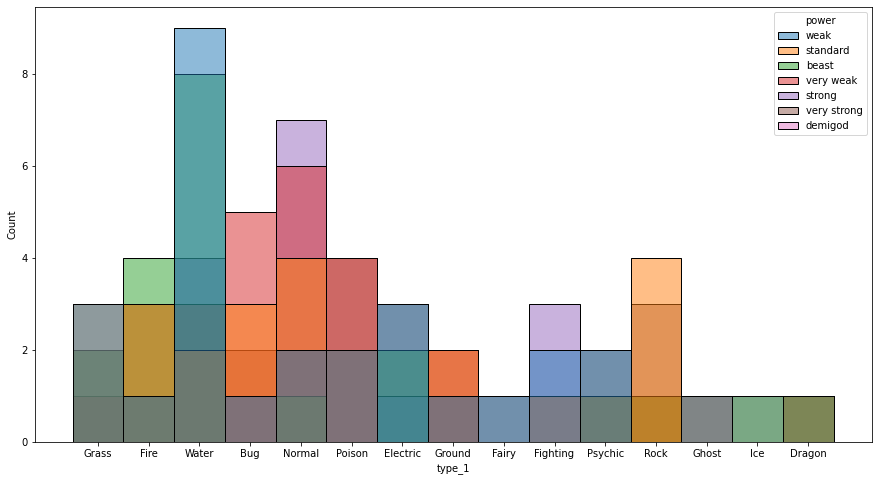

In [169]:
plt.rcParams['figure.figsize']=(15, 8)
sns.histplot(x = last.type_1, hue = last.power);

Feel free to draw your own conclusions :). My first is that water is the most commun type ;)

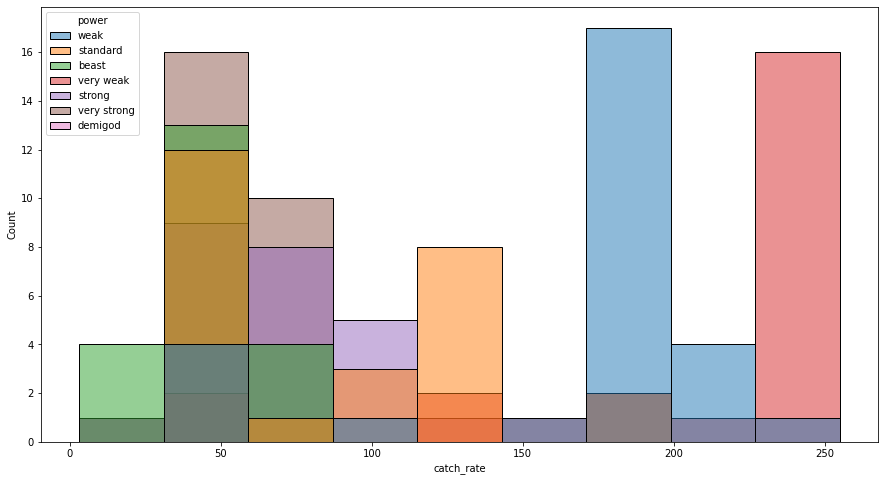

In [168]:
plt.rcParams['figure.figsize']=(15, 8)
sns.histplot(x = last.catch_rate, hue = last.power);

Here it's obvious: the strongest the Pokémon is, that hardest it is to catch

# Conclusions

In this brief study, we've segmented our Pokémons based on the sum of their different statistics:

- hp
- attack
- defense
- sp_atk
- sp_def
- speed

Then, we've identified Mewtwo as (by far) the strongest Pokémon of all. Therefore, we've isolated him from the remaining one. Afterwards, we've proceeded with a preliminar clusterization based on the values of the quartiles, using an empirical rule of the distance of interquartiles.

Identifying a subset of 70% of the 150 Pokémon, we've normalised the data in order to apply the segment the population, and thus, clusterise this subset. Finally, we've added this clusterization to the whole dataset and observed the distribution of this classification over the type_1 and catch rate.